# Librairies

In [54]:
# For preprocessing and Visualization:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For trying many technickes to choose the best of them:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For dissimilarity matrix
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Visualisation

In [3]:
db= pd.read_csv("Iris.csv")

In [5]:
db.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Observations:

There is no null values.
There is no problem with the data types.

In [7]:
db.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
# Showing the uniqye values
db["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
db.drop_duplicates(inplace=True)

db.duplicated().sum()

0

In [18]:
db["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

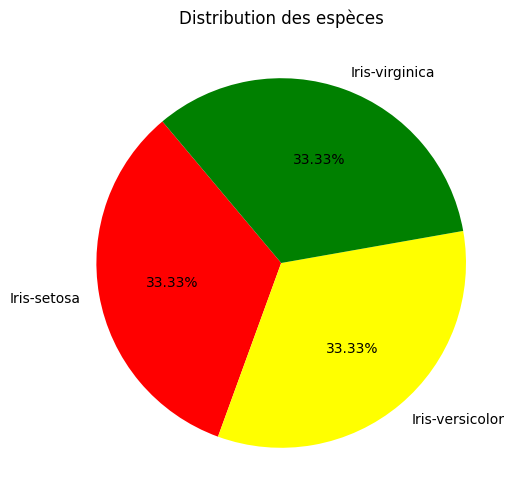

In [28]:
# Data
species_counts = db["Species"].value_counts()

# colors
colors = ['red', 'yellow', 'green']

# plot
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, colors=colors, autopct='%0.2f%%', startangle=130)
plt.title("Distribution des espèces")
plt.show()

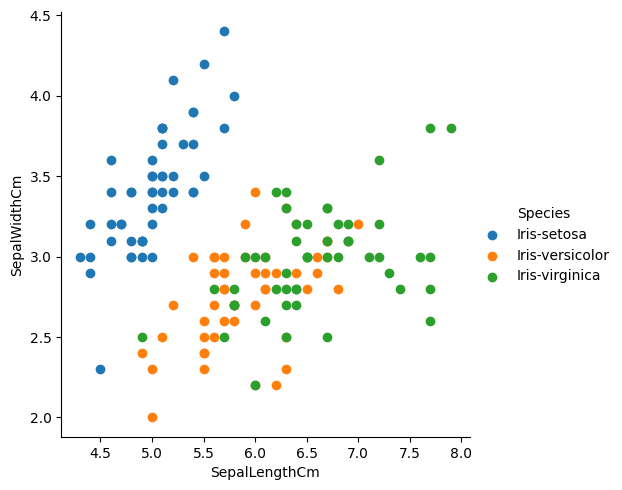

In [35]:
# Create a FacetGrid using seaborn
# The 'hue' parameter specifies the column in the DataFrame that defines the colors
# The 'height' parameter determines the height of each facet
g = sns.FacetGrid(db, hue="Species", height=5)

# Use the map function to create scatter plots within each facet
# The first argument is the plotting function (scatter plot in this case)
# The second and third arguments are the columns used for the x and y axes
g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")

# Add a legend to the plot to identify the different species
g.add_legend()

# Building Model

## SVM model

In [45]:
# Separate the data into independent variables (X) and the target variable (y)
X = db[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = db['Species']

# Convert text labels to numbers
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [46]:

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

In [47]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')

Training Accuracy: 0.97
Testing Accuracy: 1.00


In [49]:
# display  classification report

classification_rep = classification_report(y_test, y_test_pred)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



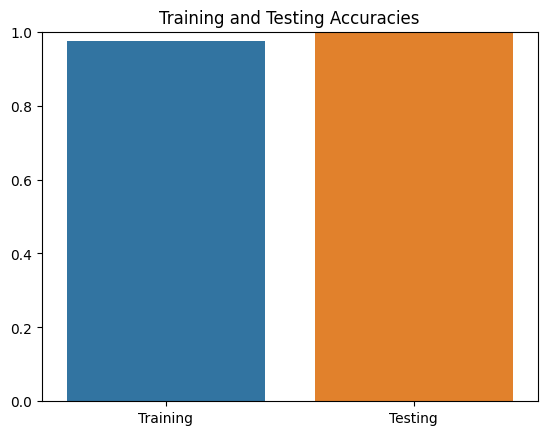

In [52]:
# Create a bar chart for visualizing accuracies
sns.barplot(x=['Training', 'Testing'], y=[accuracy_train, accuracy_test])
plt.title('Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set y-axis limit to be between 0 and 1
plt.show()

## Random Forest classifier

In [55]:

# Separate the data into independent variables (X) and the target variable (y)
X = db[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = db['Species']

# Convert text labels to numbers
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
# Predictions on the training set
y_train_pred_rf = model_rf.predict(X_train)

# Predictions on the test set
y_test_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Display the results
print(f'Training Accuracy (Random Forest): {accuracy_train_rf:.2f}')
print(f'Testing Accuracy (Random Forest): {accuracy_test_rf:.2f}')

Training Accuracy (Random Forest): 1.00
Testing Accuracy (Random Forest): 1.00


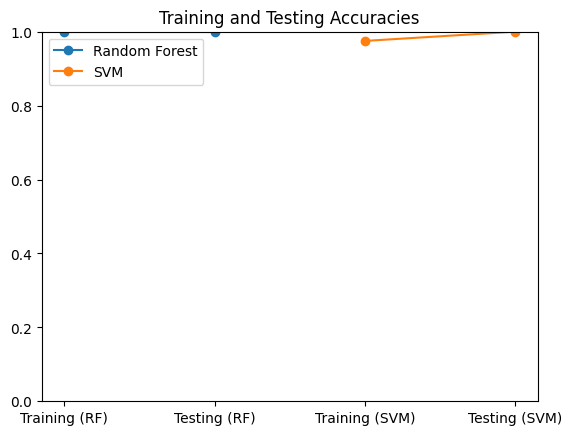

In [57]:
# Create a line plot for visualizing accuracies
plt.plot(['Training (RF)', 'Testing (RF)'], [accuracy_train_rf, accuracy_test_rf], marker='o', label='Random Forest')

# Optionally, you can add the SVM accuracies for comparison
plt.plot(['Training (SVM)', 'Testing (SVM)'], [accuracy_train, accuracy_test], marker='o', label='SVM')

plt.title('Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set y-axis limit to be between 0 and 1
plt.legend()
plt.show()